# 1D and 2D examples of how to address cluttering

### This notebook is licensed  under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1) © 2024 by André Moitinho (U. Lisbon)

**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

### 1D histogram example: Luminosity functions

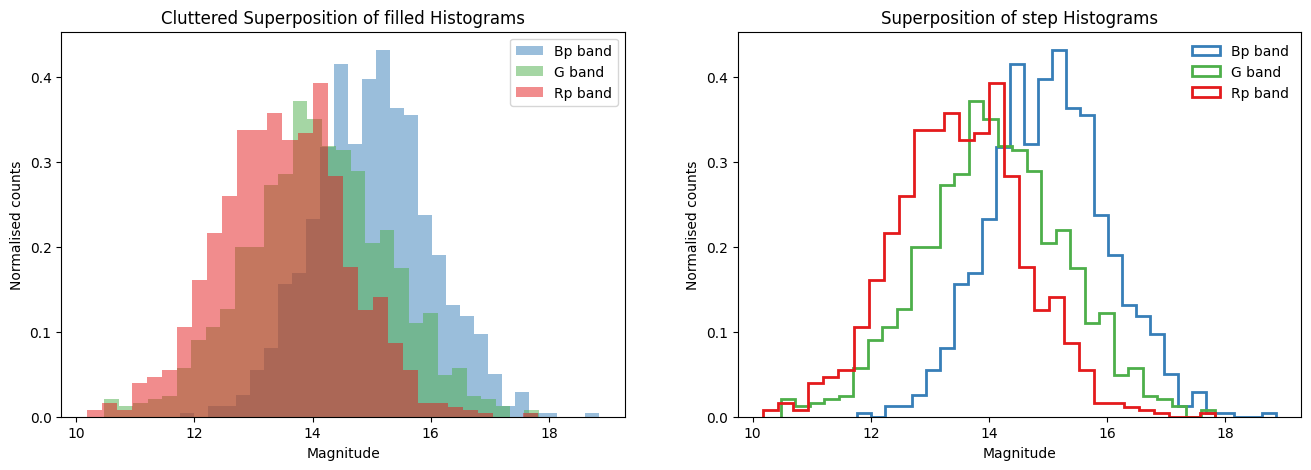

In [2]:
# Generate synthetic stellar magnitudes for three different bands (B, V, R)
np.random.seed(42)  
mags_b = np.random.normal(loc=15, scale=1, size=1000)  # Dummy Bp magnitudes
mags_v = np.random.normal(loc=14, scale=1.2, size=1000)  # Dummy G magnitudes
mags_r = np.random.normal(loc=13.5, scale=1.1, size=1000)  # Dummy Rp magnitudes

# Color-blind-friendly colors 
colors = ['#377eb8', '#4daf4a', '#e41a1c']  # Blue, Green, Red !!! Try other

plt.figure(figsize=(16, 5))
# Superposition of stepfilled Histograms
plt.subplot(121)
plt.hist(mags_b, bins=30, alpha=0.5, color=colors[0], label='Bp band', density=True)
plt.hist(mags_v, bins=30, alpha=0.5, color=colors[1], label='G band', density=True)
plt.hist(mags_r, bins=30, alpha=0.5, color=colors[2], label='Rp band', density=True)
plt.title('Cluttered Superposition of filled Histograms')
plt.xlabel('Magnitude')
plt.ylabel('Normalised counts')
plt.legend(loc='upper right')
#plt.show()

# Superposition Line of step Histograms
plt.subplot(122)
plt.hist(mags_b, bins=30, color=colors[0], label='Bp band', density=True, histtype='step', linewidth=2)
plt.hist(mags_v, bins=30, color=colors[1], label='G band', density=True, histtype='step', linewidth=2)
plt.hist(mags_r, bins=30, color=colors[2], label='Rp band', density=True, histtype='step', linewidth=2)
plt.title('Superposition of step Histograms')
plt.xlabel('Magnitude')
plt.ylabel('Normalised counts')
plt.legend(loc='upper right', frameon=False)
plt.show()


### 2D scatter plot example: stellar positions

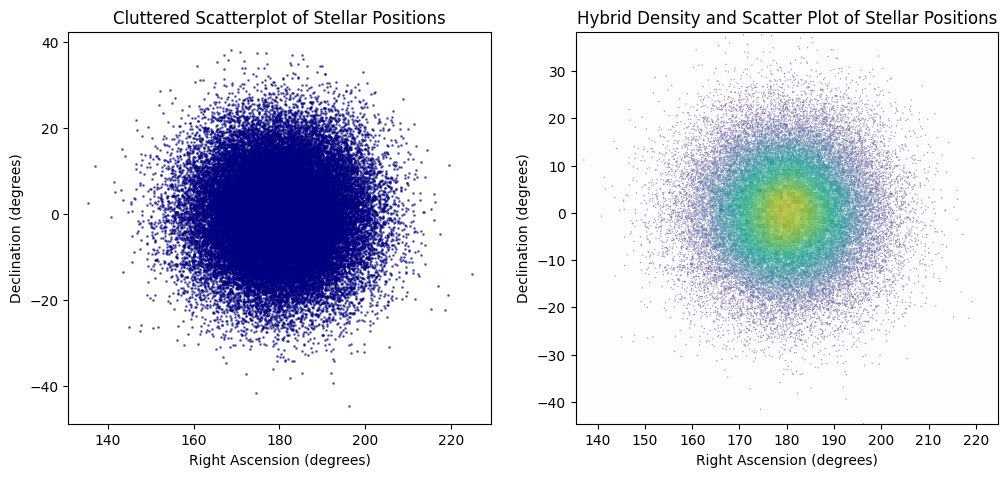

In [3]:
# Generate synthetic data: Gaussian blob for stellar positions
np.random.seed(42)  # For reproducibility
ra_center, dec_center = 180, 0  # Center of the Gaussian blob in RA (180 degrees) and Dec (0 degrees)

# Generate RA and Dec from a 2D Gaussian distribution
ra = np.random.normal(loc=ra_center, scale=10, size=50000)  # Gaussian distribution around 180 degrees with std dev of 10
dec = np.random.normal(loc=dec_center, scale=10, size=50000)  # Gaussian distribution around 0 degrees with std dev of 5

# Cluttered Scatterplot
plt.figure(figsize=(12, 6))  # Set figure size to 6x6 for 1:1 aspect ratio
plt.subplot(121)
plt.scatter(ra, dec, s=1, alpha=0.5, color='navy')
plt.title('Cluttered Scatterplot of Stellar Positions')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.gca().set_aspect('equal', adjustable='box')  # Set 1:1 aspect ratio

# Hybrid Density and Scatter Plot
plt.subplot(122)

# Calculate point density using Gaussian Kernel Density Estimation (KDE)
xy = np.vstack([ra, dec])
z = gaussian_kde(xy)(xy)

# Sort the points by density to ensure that the densest points are plotted last
idx = z.argsort()
ra, dec, z = ra[idx], dec[idx], z[idx]

# Plot scatter points with color based on density
plt.scatter(ra, dec, c=z, s=1, cmap='viridis', alpha=0.6, edgecolor='none')

# Plot density contours to visualize density areas
plt.hist2d(ra, dec, bins=100, cmap='Blues', density=True, alpha=0.3)

plt.title('Hybrid Density and Scatter Plot of Stellar Positions')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
#plt.colorbar(label='Density')
plt.gca().set_aspect('equal')  # Set 1:1 aspect ratio
plt.show()


### Now, follow best practices (colours, clutter, etc) to make the following Gaia data plots for Blanco 1 (and surrounding field stars):
* Luminosity functions
* Colour-magnitude and colour-colour diagrams
* Proper motion diagram
* Spatial distribution

**Discuss!**